## Team Project 1
#### Authors: Jacklyn Tellez & Hunter Waldridge
#### Semester: Spring 2022

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

In [39]:
weatherdata = pd.read_csv('weatherAUS.csv')

In [40]:
weatherdata.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
86670,2016-01-13,Brisbane,21.8,30.9,0.0,6.8,11.3,ENE,22.0,NNE,...,56.0,50.0,1018.5,1016.9,1.0,5.0,28.6,29.7,No,No
57204,2014-12-01,Ballarat,16.4,29.4,0.0,NaN,NaN,NNW,48.0,WNW,...,71.0,23.0,1007.0,1004.3,6.0,NaN,17.6,27.9,No,No
48728,2016-09-04,Canberra,4.9,13.9,1.0,NaN,NaN,NW,46.0,NW,...,69.0,65.0,1021.9,1023.0,NaN,NaN,10.3,12.5,No,No
115120,2010-05-16,PearceRAAF,4.1,21.3,0.0,NaN,5.5,NE,24.0,NNE,...,61.0,38.0,1019.7,1016.2,5.0,5.0,13.4,20.2,No,No
51163,2015-01-09,Tuggeranong,18.5,31.2,2.6,NaN,NaN,WSW,35.0,NW,...,75.0,37.0,1009.6,1004.9,NaN,NaN,21.3,29.7,Yes,Yes


Data types:

In [41]:
weatherdata.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Missing Data (%):

In [42]:
weatherdata.isnull().sum() * 100 / len(weatherdata)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Summary Statistics:

In [43]:
weatherdata.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Correlation Matrix:

In [44]:
weatherdata.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


<AxesSubplot:>

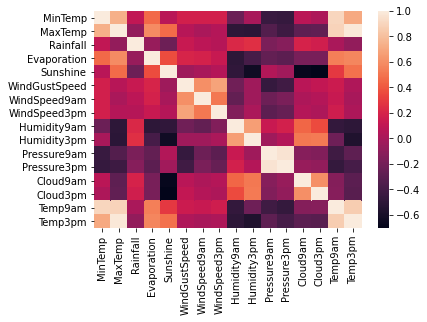

In [45]:
sns.heatmap(weatherdata.corr())

Changing date to datetime format

In [46]:
weatherdata.Date = pd.to_datetime(weatherdata.Date)

In [47]:
weatherdata.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

Adding columns for temperatures in Farenheit

In [48]:
weatherdata['MinTemp_F']=(weatherdata.MinTemp*1.8)+32
weatherdata['MaxTemp_F']=(weatherdata.MaxTemp*1.8)+32
weatherdata['Temp9am_F']=(weatherdata.Temp9am*1.8)+32
weatherdata['Temp3pm_F']=(weatherdata.Temp3pm*1.8)+32

In [49]:
weatherdata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MinTemp_F,MaxTemp_F,Temp9am_F,Temp3pm_F
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,56.12,73.22,62.42,71.24
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,45.32,77.18,62.96,75.74
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,55.22,78.26,69.80,73.76
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,48.56,82.40,64.58,79.70
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,63.50,90.14,64.04,85.46


Rearranging temp columns

In [50]:
weatherdata.insert(3, 'MinTemp_F', weatherdata.pop('MinTemp_F'))
weatherdata.insert(5, 'MaxTemp_F', weatherdata.pop('MaxTemp_F'))
weatherdata.insert(22, 'Temp9am_F',weatherdata.pop('Temp9am_F'))
weatherdata.insert(24, 'Temp3pm_F',weatherdata.pop('Temp3pm_F'))

In [51]:
weatherdata.head()

,Date,Location,MinTemp,MinTemp_F,MaxTemp,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp9am_F,Temp3pm,Temp3pm_F,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,56.12,22.9,73.22,0.6,NaN,NaN,W,...,1007.7,1007.1,8.0,NaN,16.9,62.42,21.8,71.24,No,No
1,2008-12-02,Albury,7.4,45.32,25.1,77.18,0.0,NaN,NaN,WNW,...,1010.6,1007.8,NaN,NaN,17.2,62.96,24.3,75.74,No,No
2,2008-12-03,Albury,12.9,55.22,25.7,78.26,0.0,NaN,NaN,WSW,...,1007.6,1008.7,NaN,2.0,21.0,69.80,23.2,73.76,No,No
3,2008-12-04,Albury,9.2,48.56,28.0,82.40,0.0,NaN,NaN,NE,...,1017.6,1012.8,NaN,NaN,18.1,64.58,26.5,79.70,No,No
4,2008-12-05,Albury,17.5,63.50,32.3,90.14,1.0,NaN,NaN,W,...,1010.8,1006.0,7.0,8.0,17.8,64.04,29.7,85.46,No,No


Renaming original temp columns to include C:

In [52]:
weatherdata.rename(columns={'MinTemp': 'MinTemp_C', 'MaxTemp': 'MaxTemp_C','Temp9am': 'Temp9am_C','Temp3pm':'Temp3pm_C'}, inplace=True)

In [53]:
weatherdata.head()

,Date,Location,MinTemp_C,MinTemp_F,MaxTemp_C,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am_C,Temp9am_F,Temp3pm_C,Temp3pm_F,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,56.12,22.9,73.22,0.6,NaN,NaN,W,...,1007.7,1007.1,8.0,NaN,16.9,62.42,21.8,71.24,No,No
1,2008-12-02,Albury,7.4,45.32,25.1,77.18,0.0,NaN,NaN,WNW,...,1010.6,1007.8,NaN,NaN,17.2,62.96,24.3,75.74,No,No
2,2008-12-03,Albury,12.9,55.22,25.7,78.26,0.0,NaN,NaN,WSW,...,1007.6,1008.7,NaN,2.0,21.0,69.80,23.2,73.76,No,No
3,2008-12-04,Albury,9.2,48.56,28.0,82.40,0.0,NaN,NaN,NE,...,1017.6,1012.8,NaN,NaN,18.1,64.58,26.5,79.70,No,No
4,2008-12-05,Albury,17.5,63.50,32.3,90.14,1.0,NaN,NaN,W,...,1010.8,1006.0,7.0,8.0,17.8,64.04,29.7,85.46,No,No


Summary statistics with new columns added:

In [54]:
weatherdata.describe()

,MinTemp_C,MinTemp_F,MaxTemp_C,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am_C,Temp9am_F,Temp3pm_C,Temp3pm_F
count,143975.000000,143975.000000,144199.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,143693.000000,141851.00000,141851.000000
mean,12.194034,53.949262,23.221348,73.798427,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,62.583137,21.68339,71.030103
std,6.398495,11.517291,7.119049,12.814288,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,11.679756,6.93665,12.485971
min,-8.500000,16.700000,-4.800000,23.360000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,19.040000,-5.40000,22.280000
25%,7.600000,45.680000,17.900000,64.220000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,54.140000,16.60000,61.880000
50%,12.000000,53.600000,22.600000,72.680000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,62.060000,21.10000,69.980000
75%,16.900000,62.420000,28.200000,82.760000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,70.880000,26.40000,79.520000
max,33.900000,93.020000,48.100000,118.580000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,104.360000,46.70000,116.060000


Correlation matrix with new columns:

In [55]:
weatherdata.corr()

,MinTemp_C,MinTemp_F,MaxTemp_C,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am_C,Temp9am_F,Temp3pm_C,Temp3pm_F
MinTemp_C,1.000000,1.000000,0.736555,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.901821,0.708906,0.708906
MinTemp_F,1.000000,1.000000,0.736555,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.901821,0.708906,0.708906
MaxTemp_C,0.736555,0.736555,1.000000,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.887210,0.984503,0.984503
MaxTemp_F,0.736555,0.736555,1.000000,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.887210,0.984503,0.984503
Rainfall,0.103938,0.103938,-0.074992,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,0.011192,-0.079657,-0.079657
Evaporation,0.466993,0.466993,0.587932,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.545115,0.572893,0.572893
Sunshine,0.072586,0.072586,0.470156,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.291188,0.490501,0.490501
WindGustSpeed,0.177415,0.177415,0.067615,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.150150,0.032748,0.032748
WindSpeed9am,0.175064,0.175064,0.014450,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.128545,0.004569,0.004569
WindSpeed3pm,0.175173,0.175173,0.050300,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.163030,0.027778,0.027778


<AxesSubplot:>

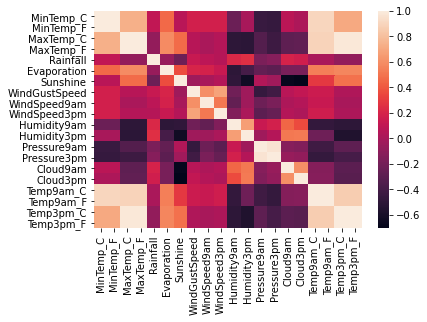

In [56]:
sns.heatmap(weatherdata.corr())

In [77]:
weatherdata['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Hobart              3193
Brisbane            3193
Melbourne           3193
Perth               3193
Adelaide            3193
Wollongong          3040
AliceSprings        3040
Albany              3040
Launceston          3040
Cairns              3040
Bendigo             3040
MountGambier        3040
Ballarat            3040
GoldCoast           3040
Albury              3040
MountGinini         3040
Townsville          3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Portland            3009
Witchcliffe         3009
Woomera             3009
Cobar               3009
Williamtown         3009
Sale                3009
WaggaWagga          3009
Mildura             3009
Moree               3009
SydneyAirport       3009
PerthAirport        3009
NorfolkIsland       3009
BadgerysCreek       3009
MelbourneAirport    3009
Dartmoor            3009
Watsonia            3009
Richmond            3009


In [78]:
weatherdata['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [79]:
weatherdata['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [80]:
weatherdata['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [81]:
weatherdata['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [82]:
weatherdata['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Yearly averages:

In [57]:
yearly_avg=weatherdata.groupby(weatherdata['Date'].dt.year).mean()

In [58]:
yearly_avg.head()

,MinTemp_C,MinTemp_F,MaxTemp_C,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am_C,Temp9am_F,Temp3pm_C,Temp3pm_F
Date,,,,,,,,,,,,,,,,,,,,
2007,12.545902,54.582623,25.086885,77.156393,3.219672,5.859016,8.086885,40.918033,9.606557,16.803279,69.557377,45.786885,1016.772131,1014.050820,4.704918,4.885246,17.267213,63.080984,23.455738,74.220328
2008,12.450996,54.411793,22.874359,73.173846,2.293541,5.158467,7.789111,41.675468,14.037946,19.432697,65.442762,49.310191,1015.903540,1013.452846,4.289265,4.298246,16.949089,62.508361,21.333407,70.400133
2009,12.160258,53.888465,23.251019,73.851835,2.166385,5.555666,7.905102,41.429908,14.514439,19.543932,67.266126,50.083950,1016.828290,1014.468909,4.126626,4.209338,16.946829,62.504292,21.796859,71.234346
2010,12.093076,53.767538,22.571247,72.628244,2.710924,4.812517,7.277599,39.384277,13.883884,18.459077,70.788379,53.932934,1018.190177,1015.867080,4.483200,4.694837,16.652613,61.974703,21.114127,70.005428
2011,12.022364,53.640256,22.540180,72.572323,2.829197,4.926629,7.313705,39.868646,14.134900,18.440913,70.539129,53.819475,1017.286005,1015.044349,4.446849,4.569086,16.671886,62.009395,21.096064,69.972916


In [59]:
yearly_avg['Date']=yearly_avg.index

Plotting average max temp over 2007-2017 in Australia

<AxesSubplot:title={'center':'Average Annual Maximum Temperature in Farenheit'}, xlabel='Date'>

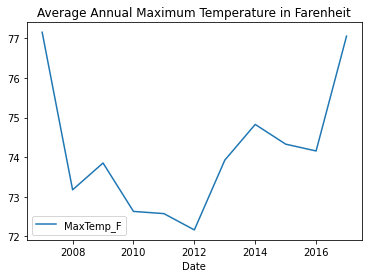

In [60]:
yearly_avg.plot(kind='line',x='Date', title='Average Annual Maximum Temperature in Farenheit', y='MaxTemp_F')

In [61]:
weatherdata.groupby(weatherdata.Location).count()

,Date,MinTemp_C,MinTemp_F,MaxTemp_C,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am_C,Temp9am_F,Temp3pm_C,Temp3pm_F,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3191,3191,3190,3190,3091,1704,1769,3167,3167,...,3185,3186,0,0,3188,3188,3189,3189,3091,3090
Albany,3040,2977,2977,2986,2986,3016,2750,2520,0,0,...,3015,3015,3002,2329,3001,3001,2328,2328,3016,3016
Albury,3040,3029,3029,3029,3029,3011,0,0,3008,3008,...,3035,3032,1289,1427,3031,3031,3032,3032,3011,3011
AliceSprings,3040,3039,3039,3038,3038,3032,2825,2520,2989,2989,...,3039,3037,2706,2679,3040,3040,3038,3038,3032,3031
BadgerysCreek,3009,2973,2973,2980,2980,2928,0,0,2933,2933,...,2841,2836,0,0,2968,2968,2965,2965,2928,2928
Ballarat,3040,3039,3039,3039,3039,3028,0,0,3009,3009,...,3016,3014,2494,1992,3028,3028,3034,3034,3028,3028
Bendigo,3040,3038,3038,3035,3035,3034,1185,0,2999,3000,...,3025,3030,2072,2268,3037,3037,3038,3038,3034,3034
Brisbane,3193,3184,3184,3179,3179,3161,3174,3144,3152,3152,...,3192,3185,3192,3191,3189,3189,3178,3178,3161,3161
Cairns,3040,3039,3039,3040,3040,2988,2670,2564,3021,3022,...,3039,3040,2833,2810,3039,3039,3040,3040,2988,2988


In [62]:
sydney = weatherdata.query('Location=="Sydney"')

In [63]:
sydney

,Date,Location,MinTemp_C,MinTemp_F,MaxTemp_C,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am_C,Temp9am_F,Temp3pm_C,Temp3pm_F,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,67.10,22.4,72.32,15.6,6.2,0.0,NaN,...,1017.6,1017.4,8.0,8.0,20.7,69.26,20.9,69.62,Yes,Yes
30177,2008-02-02,Sydney,19.5,67.10,25.6,78.08,6.0,3.4,2.7,NaN,...,1017.9,1016.4,7.0,7.0,22.4,72.32,24.8,76.64,Yes,Yes
30178,2008-02-03,Sydney,21.6,70.88,24.5,76.10,6.6,2.4,0.1,NaN,...,1016.7,1015.6,7.0,8.0,23.5,74.30,23.0,73.40,Yes,Yes
30179,2008-02-04,Sydney,20.2,68.36,22.8,73.04,18.8,2.2,0.0,NaN,...,1014.2,1011.8,8.0,8.0,21.4,70.52,20.9,69.62,Yes,Yes
30180,2008-02-05,Sydney,19.7,67.46,25.7,78.26,77.4,NaN,0.0,NaN,...,1008.3,1004.8,8.0,8.0,22.5,72.50,25.5,77.90,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,47.48,19.6,67.28,0.0,2.0,7.8,SSE,...,1025.9,1025.3,2.0,2.0,10.5,50.90,17.9,64.22,No,No
33516,2017-06-22,Sydney,9.3,48.74,19.2,66.56,0.0,2.0,9.2,W,...,1028.5,1024.6,2.0,2.0,11.0,51.80,18.7,65.66,No,No
33517,2017-06-23,Sydney,9.4,48.92,17.7,63.86,0.0,2.4,2.7,W,...,1020.8,1015.0,6.0,6.0,10.2,50.36,17.3,63.14,No,No
33518,2017-06-24,Sydney,10.1,50.18,19.3,66.74,0.0,1.4,9.3,W,...,1017.3,1015.1,5.0,2.0,12.4,54.32,19.0,66.20,No,No


Displot of Sydney's Evaporation Values

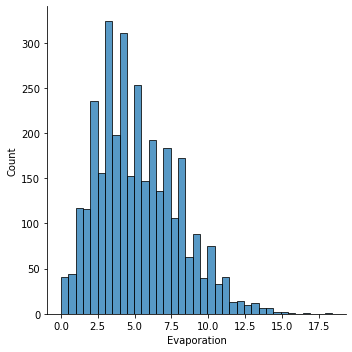

In [64]:
sns.displot(sydney['Evaporation'])

Displot of evaporation for all cities (heavily skewed)

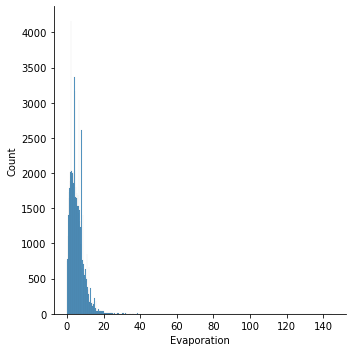

In [65]:
sns.displot(weatherdata['Evaporation'])

Here I looked at the max, this shows why the data is so skewed. There is a huge outlier:

In [66]:
weatherdata.Evaporation.max()

145.0

In [67]:
bigcities=weatherdata.query('Location=="Adelaide" or Location=="Melbourne"')

In [68]:
bigcities

,Date,Location,MinTemp_C,MinTemp_F,MaxTemp_C,MaxTemp_F,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am_C,Temp9am_F,Temp3pm_C,Temp3pm_F,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,49.10,15.4,59.72,2.0,2.8,7.0,W,...,1006.8,1010.3,1.0,7.0,11.0,51.80,14.6,58.28,Yes,No
67201,2008-07-02,Melbourne,11.0,51.80,14.5,58.10,0.6,5.2,4.0,W,...,1013.4,1016.2,7.0,4.0,11.8,53.24,13.7,56.66,No,Yes
67202,2008-07-03,Melbourne,8.4,47.12,14.1,57.38,1.4,2.0,0.8,W,...,1024.8,1024.3,7.0,7.0,10.6,51.08,13.9,57.02,Yes,No
67203,2008-07-04,Melbourne,9.1,48.38,14.5,58.10,0.6,1.8,4.2,E,...,1030.2,1029.0,7.0,6.0,10.2,50.36,13.1,55.58,No,No
67204,2008-07-05,Melbourne,4.3,39.74,15.5,59.90,0.0,0.8,8.4,N,...,1028.9,1024.9,2.0,5.0,5.5,41.90,14.6,58.28,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99508,2017-06-21,Adelaide,4.5,40.10,19.2,66.56,0.0,NaN,NaN,WSW,...,1029.5,1026.9,NaN,NaN,10.0,50.00,17.8,64.04,No,No
99509,2017-06-22,Adelaide,4.6,40.28,19.5,67.10,0.0,NaN,NaN,N,...,1026.9,1022.3,NaN,NaN,9.6,49.28,18.9,66.02,No,No
99510,2017-06-23,Adelaide,5.4,41.72,18.5,65.30,0.0,NaN,NaN,NNW,...,1020.0,1017.7,NaN,NaN,11.7,53.06,17.1,62.78,No,No
99511,2017-06-24,Adelaide,5.0,41.00,17.3,63.14,0.0,NaN,NaN,W,...,1020.7,1018.5,NaN,NaN,9.6,49.28,16.7,62.06,No,No


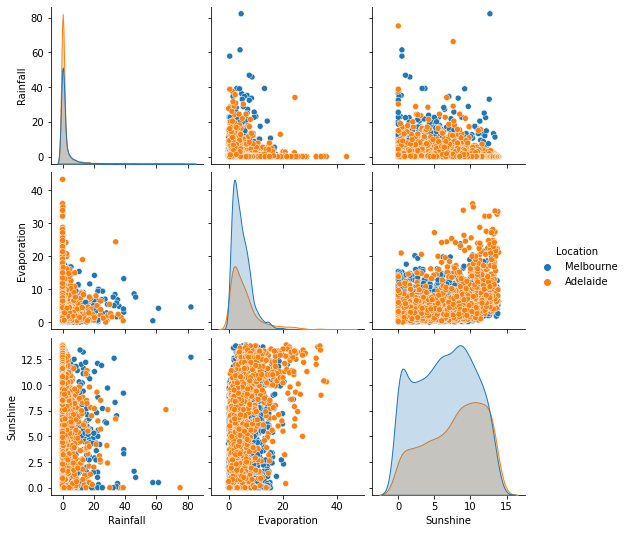

In [69]:
sns.pairplot(bigcities[['Rainfall','Evaporation','Sunshine', 'Location']], hue='Location')

Plotting average rainfall

In [70]:
rainfall_yearly=yearly_avg['Rainfall']

In [71]:
rainfall_yearly.head()

Date
2007    3.219672
2008    2.293541
2009    2.166385
2010    2.710924
2011    2.829197
Name: Rainfall, dtype: float64

Text(0, 0.5, 'Rainfall')

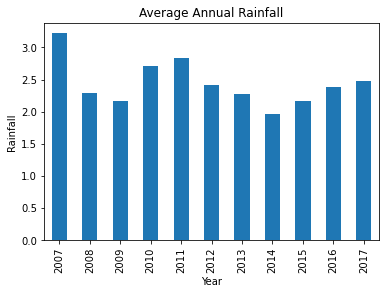

In [72]:
meanchart = rainfall_yearly.plot(kind='bar', title='Average Annual Rainfall')
plt.xlabel("Year")
plt.ylabel("Rainfall")

<AxesSubplot:xlabel='Date'>

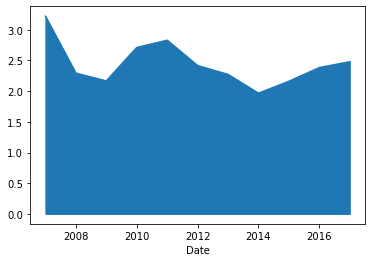

In [73]:
rainfall_yearly.plot(kind='area')

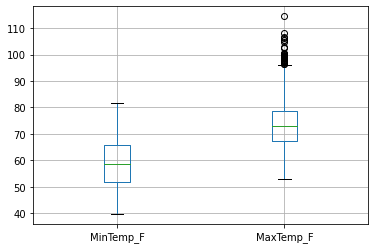

In [37]:
boxplot= sydney.boxplot(column=['MinTemp_F', 'MaxTemp_F'])

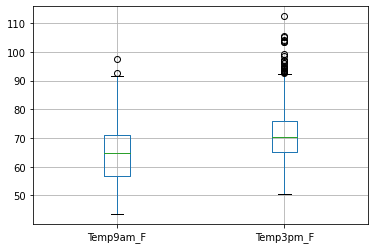

In [74]:
boxplot= sydney.boxplot(column=['Temp9am_F', 'Temp3pm_F'])

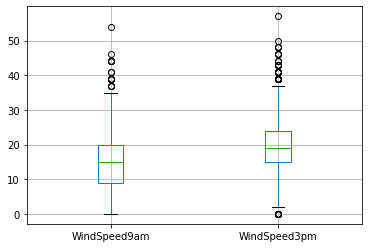

In [75]:
boxplot= sydney.boxplot(column=['WindSpeed9am', 'WindSpeed3pm'])

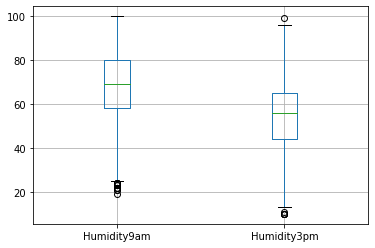

In [76]:
boxplot= sydney.boxplot(column=['Humidity9am', 'Humidity3pm'])